In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    roc_auc_score,
    precision_recall_curve,
    auc,
    confusion_matrix
)

df = pd.read_csv("final_nubank_fraud_output.csv")
print(df.shape)
df.head()


(1000000, 51)


,is_fraud,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,txn_velocity_score,avg_txn_amount_7d,anomaly_score_proxy,autoencoder_score,xgb_score,ada_score,transformer_score,lstm_score,final_moe_score,fraud_risk_level
0,0,0.7,0.067123,-1,33,30,0.039767,11.063369,AA,935,...,4,196.023889,0.138721,0.001967,0.233614,0.146723,0.011792,0.0,0.002437,LOW
1,0,0.1,0.152821,-1,12,30,1.918321,-0.777848,AC,1056,...,4,196.023889,0.285980,0.001260,0.418236,0.141470,0.011792,0.0,0.009332,LOW
2,0,0.1,0.992596,-1,50,30,1.473879,30.183535,AA,2192,...,6,196.023889,0.229197,0.002109,0.293224,0.141470,0.011792,0.0,0.003439,LOW
3,0,0.9,0.716131,-1,181,50,0.001254,-0.702453,AB,3799,...,4,196.023889,0.174789,0.001358,0.502430,0.146723,0.011792,0.0,0.016968,LOW
4,0,0.1,0.850124,-1,81,30,0.007107,23.151245,AB,2085,...,3,196.023889,0.123573,0.003574,0.230821,0.137034,0.011792,0.0,0.004062,LOW


In [9]:
df["is_fraud"].value_counts(normalize=True)


is_fraud
0    0.988971
1    0.011029
Name: proportion, dtype: float64

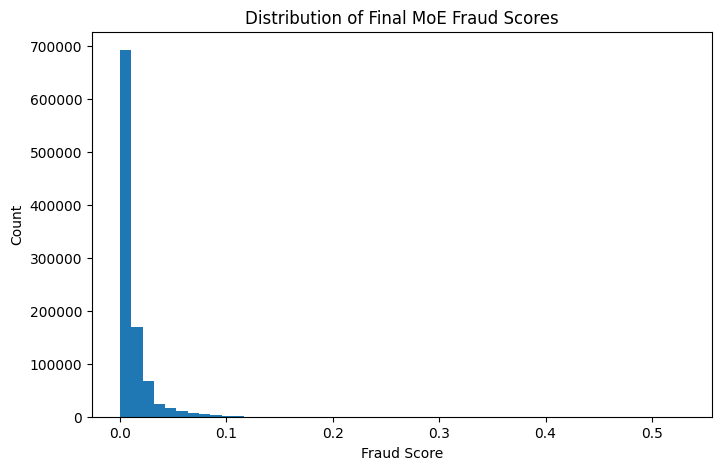

In [10]:
plt.figure(figsize=(8,5))
plt.hist(df["final_moe_score"], bins=50)
plt.title("Distribution of Final MoE Fraud Scores")
plt.xlabel("Fraud Score")
plt.ylabel("Count")
plt.show()


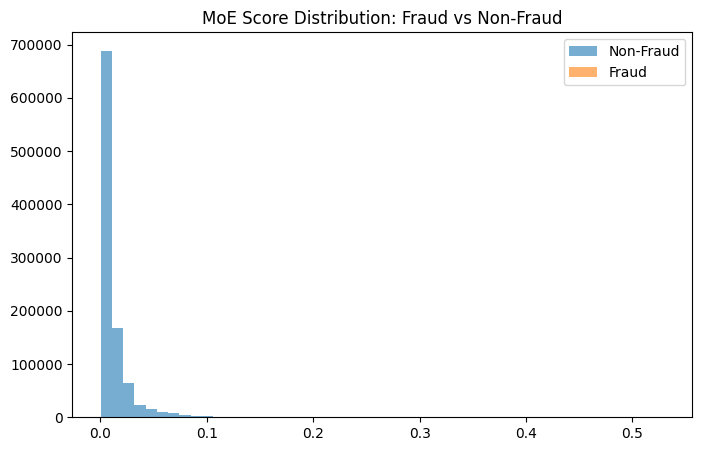

In [11]:
plt.figure(figsize=(8,5))
plt.hist(df[df["is_fraud"]==0]["final_moe_score"], bins=50, alpha=0.6, label="Non-Fraud")
plt.hist(df[df["is_fraud"]==1]["final_moe_score"], bins=50, alpha=0.6, label="Fraud")
plt.legend()
plt.title("MoE Score Distribution: Fraud vs Non-Fraud")
plt.show()


In [12]:
moe_auc = roc_auc_score(df["is_fraud"], df["final_moe_score"])
print("Final MoE AUC:", round(moe_auc, 4))


Final MoE AUC: 0.7769


In [13]:
experts = {
    "LSTM": "lstm_score",
    "Transformer": "transformer_score",
    "Autoencoder": "autoencoder_score",
    "XGBoost": "xgb_score",
    "AdaBoost": "ada_score",
    "MoE": "final_moe_score"
}

for name, col in experts.items():
    auc_val = roc_auc_score(df["is_fraud"], df[col])
    print(f"{name} AUC: {auc_val:.4f}")


LSTM AUC: 0.5108
Transformer AUC: 0.5000
Autoencoder AUC: 0.5582
XGBoost AUC: 0.7755
AdaBoost AUC: 0.6698
MoE AUC: 0.7769


In [14]:
df["fraud_risk_level"].value_counts(normalize=True)


fraud_risk_level
LOW       0.999998
MEDIUM    0.000002
Name: proportion, dtype: float64